## Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("weatherAUS.csv")
df.sample(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
74032,2014-11-21,Nhil,11.9,25.8,1.4,NaN,NaN,WSW,43.0,SW,...,68.0,31.0,1012.5,1011.1,NaN,NaN,14.5,23.7,Yes,No
127722,2011-07-10,Walpole,7.2,16.4,0.2,NaN,NaN,E,28.0,NaN,...,99.0,72.0,1030.9,1027.9,NaN,NaN,9.7,14.8,No,No
19995,2014-05-29,NorahHead,12.4,20.7,0.0,NaN,NaN,SSE,48.0,W,...,64.0,83.0,1022.7,1021.8,NaN,NaN,16.2,17.3,No,Yes
22954,2014-04-09,NorfolkIsland,17.1,23.0,22.4,2.0,4.3,NE,30.0,NE,...,90.0,76.0,1014.4,1013.1,7.0,7.0,18.7,21.2,Yes,No
134401,2012-10-01,Launceston,4.9,19.8,0.0,NaN,NaN,NNW,24.0,NNW,...,76.0,40.0,1023.8,1024.1,NaN,NaN,12.7,18.8,No,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

## Converting the Date from object type to datetime and extracting the yeara nd months only

In [4]:
df.Date = pd.to_datetime(df.Date, format="%Y/%m/%d", errors ="raise")
df["Year"] = pd.DatetimeIndex(df.Date).year
df["Month"]=pd.DatetimeIndex(df.Date).month
df.drop("Date", axis="columns", inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   Sunshine       75625 non-null   float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    140953 non-null  float64
 14  Pressure9am    130395 non-null  float64
 15  Pressure3pm    130432 non-null  float64
 16  Cloud9am       89572 non-null   float64
 17  Cloud3pm       86102 non-null

## Missing value impuatation and dropping the null and nan values from the categorical columns (row wise)

In [5]:
def fill_missing_value(df):
    for col in df.columns:
        if df[col].dtypes in ["int64", "float64"]:
            df[col].fillna(np.mean(df[col]), inplace=True)
            
fill_missing_value(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        145460 non-null  float64
 2   MaxTemp        145460 non-null  float64
 3   Rainfall       145460 non-null  float64
 4   Evaporation    145460 non-null  float64
 5   Sunshine       145460 non-null  float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  145460 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   145460 non-null  float64
 11  WindSpeed3pm   145460 non-null  float64
 12  Humidity9am    145460 non-null  float64
 13  Humidity3pm    145460 non-null  float64
 14  Pressure9am    145460 non-null  float64
 15  Pressure3pm    145460 non-null  float64
 16  Cloud9am       145460 non-null  float64
 17  Cloud3pm       145460 non-nul

In [6]:
df.dropna(axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123710 entries, 0 to 145458
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       123710 non-null  object 
 1   MinTemp        123710 non-null  float64
 2   MaxTemp        123710 non-null  float64
 3   Rainfall       123710 non-null  float64
 4   Evaporation    123710 non-null  float64
 5   Sunshine       123710 non-null  float64
 6   WindGustDir    123710 non-null  object 
 7   WindGustSpeed  123710 non-null  float64
 8   WindDir9am     123710 non-null  object 
 9   WindDir3pm     123710 non-null  object 
 10  WindSpeed9am   123710 non-null  float64
 11  WindSpeed3pm   123710 non-null  float64
 12  Humidity9am    123710 non-null  float64
 13  Humidity3pm    123710 non-null  float64
 14  Pressure9am    123710 non-null  float64
 15  Pressure3pm    123710 non-null  float64
 16  Cloud9am       123710 non-null  float64
 17  Cloud3pm       123710 non-nul

## Splitting the Data into the Dependent and Independent Variables

In [7]:
X = df.drop("RainTomorrow", axis="columns")
y=df["RainTomorrow"]
y=[1 if ele=="Yes" else 0 for ele in y]
y=pd.Series(y, name = "target")

In [8]:
num_df = X.select_dtypes(include="number")
cat_df = X.select_dtypes(include="object")
num_df.sample(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month
76794,9.4,20.4,0.0,4.400000,10.300000,28.0,7.0,19.0,95.0,56.0,1027.30000,1026.700000,5.000000,1.00000,13.2,18.7,2014,3
8342,10.5,18.7,0.0,5.000000,7.611178,63.0,19.0,24.0,92.0,37.0,1013.70000,1007.400000,7.000000,3.00000,11.3,17.4,2015,7
46181,1.8,14.5,0.0,1.200000,7.100000,24.0,7.0,11.0,81.0,47.0,1030.50000,1028.200000,1.000000,3.00000,6.6,12.9,2009,6
72336,6.8,18.3,0.0,2.000000,8.200000,31.0,7.0,17.0,93.0,54.0,1026.80000,1025.600000,1.000000,5.00000,9.8,16.5,2014,7
55059,3.5,5.0,0.4,5.468232,7.611178,28.0,13.0,4.0,98.0,98.0,1017.64994,1015.255889,4.447461,4.50993,4.5,4.9,2017,5


In [9]:
cat_df.sample(5)

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
49840,Tuggeranong,W,NE,NNW,No
143580,Katherine,ENE,E,S,No
81199,Dartmoor,NW,NNE,N,No
87094,Brisbane,NE,ENE,ENE,No
24905,Penrith,ESE,SSW,E,No


## Bivariate Analysis for categorical Data

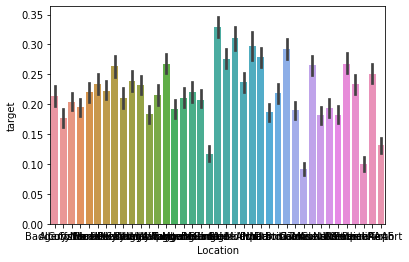

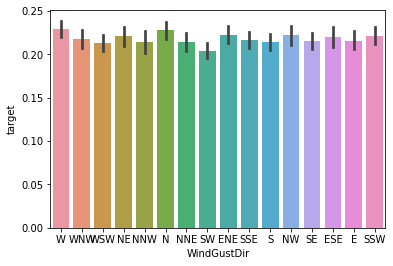

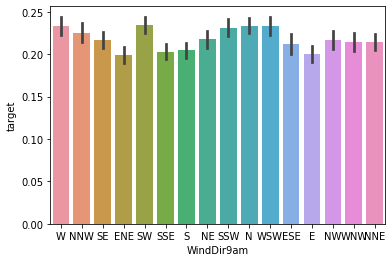

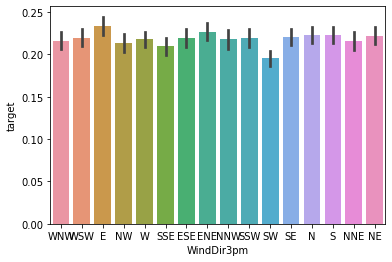

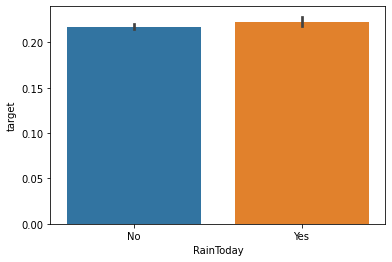

In [10]:
cat_df_merged = pd.concat([y, cat_df], axis =1, join="inner")
for col in cat_df.columns:
    plt.figure()
    sns.barplot(x=col, y="target", data=cat_df_merged)
plt.show()

It can be inferred from the plot that the all catgorical columns have same frequency of data regarding the target columns. Hence we can remove all these categorical data

## Treating Outliers with capping and flooring 

In [11]:
num_df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month
count,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000
mean,12.413917,23.474808,2.375661,5.551665,7.669315,40.685280,15.011689,19.174578,67.664315,50.856904,1017.416706,1015.029505,4.422374,4.498630,17.268860,21.895705,2012.806111,6.431824
std,6.366792,7.205898,8.528039,3.245612,2.782271,13.388636,8.307285,8.571039,18.975503,20.839568,6.765690,6.703817,2.280965,2.124822,6.477882,7.005865,2.528473,3.475113
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,7.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,2007.000000,1.000000
25%,7.800000,18.100000,0.000000,4.200000,7.611178,31.000000,9.000000,13.000000,56.000000,36.000000,1013.200000,1010.700000,3.000000,4.000000,12.500000,16.800000,2011.000000,3.000000
50%,12.200000,23.000000,0.000000,5.468232,7.611178,39.000000,13.000000,19.000000,68.880831,51.539116,1017.649940,1015.255889,4.447461,4.509930,16.990631,21.500000,2013.000000,6.000000
75%,17.000000,28.600000,0.800000,5.600000,9.000000,48.000000,20.000000,24.000000,81.000000,65.000000,1021.700000,1019.300000,6.000000,6.000000,21.900000,26.700000,2015.000000,9.000000
max,33.900000,48.100000,367.600000,86.200000,14.500000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,2017.000000,12.000000


In [12]:
def outlier_cap(X):
    X=X.clip(lower=X.quantile(0.01))
    X=X.clip(upper=X.quantile(0.99))
    return X
num_df = num_df.apply(outlier_cap)
num_df.shape

(123710, 18)

In [13]:
num_df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month
count,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000
mean,12.418483,23.495927,2.105763,5.478403,7.667523,40.624978,14.948792,19.132665,67.712662,50.857421,1017.434648,1015.046086,4.422366,4.498621,17.274939,21.914772,2012.806604,6.431824
std,6.307408,7.066271,5.940993,2.711768,2.778523,13.033788,8.080515,8.369497,18.836373,20.757514,6.605441,6.547939,2.280950,2.124807,6.382766,6.865788,2.527438,3.475113
min,-1.491000,9.100000,0.000000,0.400000,0.000000,17.000000,2.000000,4.000000,17.000000,8.000000,1000.300000,998.700000,0.000000,0.000000,3.100000,7.600000,2008.000000,1.000000
25%,7.800000,18.100000,0.000000,4.200000,7.611178,31.000000,9.000000,13.000000,56.000000,36.000000,1013.200000,1010.700000,3.000000,4.000000,12.500000,16.800000,2011.000000,3.000000
50%,12.200000,23.000000,0.000000,5.468232,7.611178,39.000000,13.000000,19.000000,68.880831,51.539116,1017.649940,1015.255889,4.447461,4.509930,16.990631,21.500000,2013.000000,6.000000
75%,17.000000,28.600000,0.800000,5.600000,9.000000,48.000000,20.000000,24.000000,81.000000,65.000000,1021.700000,1019.300000,6.000000,6.000000,21.900000,26.700000,2015.000000,9.000000
max,25.900000,40.300000,38.000000,16.000000,13.300000,81.000000,39.000000,43.000000,100.000000,97.000000,1033.500000,1031.100000,8.000000,8.000000,31.400000,38.600000,2017.000000,12.000000


## Feature Selection 

In [14]:
# Remove feature with zero variance
from sklearn.feature_selection import VarianceThreshold

var_sel = VarianceThreshold(threshold=0)
var_sel.fit(num_df)
cols = var_sel.get_support(indices=True)
num_df = num_df.iloc[:,cols]
num_df.shape

(123710, 18)

## Checking the class Imbalance
We will handle the class imbalance problem with SMOTE from imblearn libary

In [15]:
# we are dropping all categorical columns as per bivariate analysis
X = num_df

from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy="minority")
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

0    96318
1    96318
Name: target, dtype: int64

## Traintest Split and Scaling

In [28]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.25, random_state=40, stratify=y_sm)
X_train.shape, y_train.shape

((144477, 18), (144477,))

In [26]:
mm_sc = MinMaxScaler()
X_train_sc = mm_sc.fit_transform(X_train)
X_test_sc = mm_sc.transform(X_test)
X_train_sc[:5]

array([[0.24062648, 0.36217949, 0.        , 0.3974359 , 0.84962406,
        0.34375   , 0.35135135, 0.07692308, 0.63855422, 0.24719101,
        0.82228916, 0.80246914, 0.5       , 0.625     , 0.20141343,
        0.33870968, 0.11111111, 0.81818182],
       [0.43046986, 0.2724359 , 0.06315789, 0.07692308, 0.33082707,
        0.078125  , 0.18918919, 0.12820513, 0.78313253, 0.48314607,
        0.62650602, 0.62345679, 0.875     , 0.375     , 0.32862191,
        0.30967742, 0.22222222, 0.36363636],
       [0.5838049 , 0.45192308, 0.07368421, 0.32488664, 0.57226899,
        0.421875  , 0.2972973 , 0.46153846, 0.78313253, 0.5505618 ,
        0.52258855, 0.51098422, 0.55593266, 0.56374126, 0.49116608,
        0.45806452, 0.33333333, 1.        ],
       [0.71888577, 0.65064103, 0.        , 0.44871795, 0.80451128,
        0.28125   , 0.35135135, 0.51282051, 0.56626506, 0.50561798,
        0.45180723, 0.41975309, 0.125     , 0.25      , 0.79858657,
        0.67096774, 0.11111111, 0.27272727],
    

In [27]:
X_test_sc[:5]

array([[0.54795436, 0.54576693, 0.00494705, 0.21437642, 0.57226899,
        0.21140672, 0.16053893, 0.31231228, 0.60096242, 0.38797786,
        0.63249847, 0.58913543, 0.35340717, 0.59253104, 0.55162407,
        0.56712682, 0.34000663, 0.09090909],
       [0.50348655, 0.56730769, 0.00526316, 0.32488664, 0.57226899,
        0.375     , 0.2972973 , 0.28205128, 0.57831325, 0.30337079,
        0.46084337, 0.47530864, 0.55593266, 0.56374126, 0.5335689 ,
        0.59677419, 0.77777778, 0.90909091],
       [0.63126574, 0.67307692, 0.        , 0.32488664, 0.57226899,
        0.453125  , 0.59459459, 0.41025641, 0.01204819, 0.07865169,
        0.46385542, 0.41666667, 0.55593266, 0.56374126, 0.72084806,
        0.67741935, 0.88888889, 0.90909091],
       [0.22332847, 0.18422102, 0.07287572, 0.32488664, 0.57226899,
        0.578125  , 0.1205837 , 0.42248611, 0.93401255, 0.6745025 ,
        0.66946127, 0.61353377, 0.55593266, 0.56374126, 0.20848057,
        0.21607948, 0.55043515, 0.54545455],
    

## Building the ANN network with three hidden later [60, 30, 15] neurons
Without drop out layer

In [29]:
import tensorflow as tf
from tensorflow import keras

In [30]:
X_train_sc.shape

(144477, 18)

In [69]:
model = keras.Sequential([
    keras.layers.Dense(256, input_dim=18, activation='relu'),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X_train_sc, y_train, epochs=200, batch_size=8)

Epoch 1/200
18060/18060 [==============================] - 25s 1ms/step - loss: 0.4428 - accuracy: 0.7914
Epoch 2/200
18060/18060 [==============================] - 25s 1ms/step - loss: 0.4245 - accuracy: 0.8013
Epoch 3/200
18060/18060 [==============================] - 25s 1ms/step - loss: 0.4163 - accuracy: 0.8051
Epoch 4/200
18060/18060 [==============================] - 25s 1ms/step - loss: 0.4104 - accuracy: 0.8084
Epoch 5/200
18060/18060 [==============================] - 25s 1ms/step - loss: 0.4062 - accuracy: 0.8114
Epoch 6/200
18060/18060 [==============================] - 25s 1ms/step - loss: 0.4024 - accuracy: 0.8131
Epoch 7/200
18060/18060 [==============================] - 25s 1ms/step - loss: 0.3992 - accuracy: 0.8153
Epoch 8/200
18060/18060 [==============================] - 25s 1ms/step - loss: 0.3960 - accuracy: 0.8175
Epoch 9/200
18060/18060 [==============================] - 25s 1ms/step - loss: 0.3941 - accuracy: 0.8174
Epoch 10/200
18060/18060 [====================

18060/18060 [==============================] - 21s 1ms/step - loss: 0.3268 - accuracy: 0.8545
Epoch 78/200
18060/18060 [==============================] - 21s 1ms/step - loss: 0.3260 - accuracy: 0.8565
Epoch 79/200
18060/18060 [==============================] - 1615s 89ms/step - loss: 0.3253 - accuracy: 0.8556
Epoch 80/200
18060/18060 [==============================] - 18s 1ms/step - loss: 0.3263 - accuracy: 0.8558
Epoch 81/200
18060/18060 [==============================] - 18s 1ms/step - loss: 0.3259 - accuracy: 0.8556
Epoch 82/200
18060/18060 [==============================] - 18s 1ms/step - loss: 0.3253 - accuracy: 0.8555
Epoch 83/200
18060/18060 [==============================] - 18s 1ms/step - loss: 0.3244 - accuracy: 0.8569
Epoch 84/200
18060/18060 [==============================] - 18s 1ms/step - loss: 0.3256 - accuracy: 0.8559
Epoch 85/200
18060/18060 [==============================] - 19s 1ms/step - loss: 0.3241 - accuracy: 0.8561
Epoch 86/200
18060/18060 [=====================

18060/18060 [==============================] - 20s 1ms/step - loss: 0.3152 - accuracy: 0.8613
Epoch 154/200
18060/18060 [==============================] - 20s 1ms/step - loss: 0.3144 - accuracy: 0.8624
Epoch 155/200
18060/18060 [==============================] - 21s 1ms/step - loss: 0.3152 - accuracy: 0.8629
Epoch 156/200
18060/18060 [==============================] - 3566s 197ms/step - loss: 0.3146 - accuracy: 0.8624
Epoch 157/200
18060/18060 [==============================] - 4118s 228ms/step - loss: 0.3139 - accuracy: 0.8626
Epoch 158/200
18060/18060 [==============================] - 26s 1ms/step - loss: 0.3153 - accuracy: 0.8617
Epoch 159/200
18060/18060 [==============================] - 26s 1ms/step - loss: 0.3155 - accuracy: 0.8620
Epoch 160/200
18060/18060 [==============================] - 26s 1ms/step - loss: 0.3135 - accuracy: 0.8625
Epoch 161/200
18060/18060 [==============================] - 25s 1ms/step - loss: 0.3132 - accuracy: 0.8624
Epoch 162/200
18060/18060 [=======

In [67]:
model.evaluate(X_test_sc, y_test)

1505/1505 [==============================] - 2s 1ms/step - loss: 0.3975 - accuracy: 0.8155


[0.39751380681991577, 0.8155277371406555]

In [48]:
y_pred = model.predict(X_test_sc).reshape(-1)
y_pred = [1 if y>0.5 else 0 for y in y_pred]
y_pred = np.array(y_pred)

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81     24080
           1       0.81      0.83      0.82     24079

    accuracy                           0.82     48159
   macro avg       0.82      0.82      0.82     48159
weighted avg       0.82      0.82      0.82     48159



## Model with dropout layers

In [53]:
modeld = keras.Sequential([
    keras.layers.Dense(60, input_dim=18, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation="sigmoid")])

modeld.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
modeld.fit(X_train_sc, y_train, epochs=10, batch_size=8)

Epoch 1/10
18060/18060 [==============================] - 23s 1ms/step - loss: 0.5064 - accuracy: 0.7622
Epoch 2/10
18060/18060 [==============================] - 23s 1ms/step - loss: 0.4813 - accuracy: 0.7797
Epoch 3/10
18060/18060 [==============================] - 23s 1ms/step - loss: 0.4766 - accuracy: 0.7822
Epoch 4/10
18060/18060 [==============================] - 23s 1ms/step - loss: 0.4734 - accuracy: 0.7834
Epoch 5/10
18060/18060 [==============================] - 23s 1ms/step - loss: 0.4718 - accuracy: 0.7858
Epoch 6/10
18060/18060 [==============================] - 23s 1ms/step - loss: 0.4692 - accuracy: 0.7876
Epoch 7/10
18060/18060 [==============================] - 23s 1ms/step - loss: 0.4687 - accuracy: 0.7885
Epoch 8/10
18060/18060 [==============================] - 23s 1ms/step - loss: 0.4671 - accuracy: 0.7885
Epoch 9/10
18060/18060 [==============================] - 23s 1ms/step - loss: 0.4660 - accuracy: 0.7892
Epoch 10/10
18060/18060 [==============================